# Practice Question
1. Load the Iris dataset. Take the first 2 features.
2. Perform OnevsOne and OnevsRest classification using the SVM.
3. Plot the descision boundaries. Compare the decision boundaries with Logistic Regression.

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

In [16]:
clf = OneVsOneClassifier(LinearSVC()).fit(X_train, y_train)
pred = clf.predict(X_test)

In [17]:
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.833333333333


In [10]:
def plot_map(clf, title, labels):
    h = .008  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(np.array(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])[labels])
    cmap_bold = ListedColormap(np.array(['#FF0000', '#00FF00', '#0000FF']))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
    y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x', cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1', fontsize=20)
    plt.ylabel('Feature 2', fontsize=20)
    plt.title(title, fontsize=20)


    plt.show()

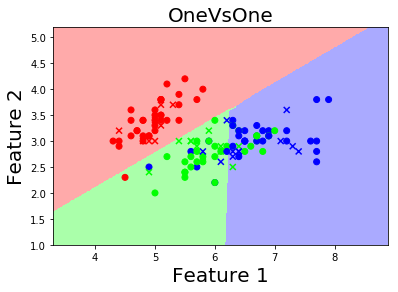

In [18]:
plot_map(clf, 'OneVsOne', [0,1,2])

In [19]:
clf = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train)
pred = clf.predict(X_test)

In [20]:
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.766666666667


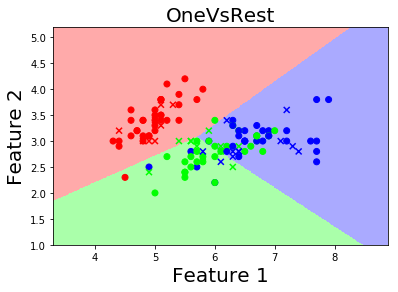

In [21]:
plot_map(clf, 'OneVsRest', [0,1,2])

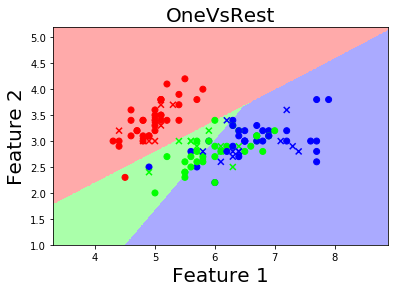

In [28]:
clf = OneVsOneClassifier(LogisticRegression(C=1)).fit(X_train, y_train)
plot_map(clf, 'OneVsRest', [0,1,2])

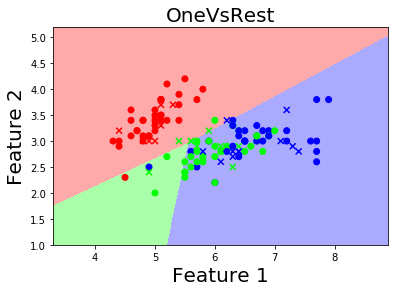

In [29]:
clf = OneVsRestClassifier(LogisticRegression(C=1)).fit(X_train, y_train)
plot_map(clf, 'OneVsRest', [0,1,2])